In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load th data
data = pd.read_csv("10000 BT Records.csv")

In [3]:
#convert deposit to float
data["Withdrawls"]=pd.to_numeric(data["Withdrawls"].str.replace(",",""), errors="coerce")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         10000 non-null  object 
 1   Description  10000 non-null  object 
 2   Deposits     10000 non-null  object 
 3   Withdrawls   10000 non-null  float64
 4   Balance      10000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 390.8+ KB


In [5]:
#convert date to datetime
data['Date']=pd.to_datetime(data['Date'], format='%d-%b-%Y')

In [6]:
print(data)

           Date Description   Deposits  Withdrawls     Balance
0    2020-08-20        Cash  97,540.00        0.00  170,542.01
1    2020-08-20  Commission      00.00    34108.40  136,433.61
2    2020-08-20         ATM      41.00        0.00  136,474.61
3    2020-08-20    Interest      50.00        0.00  136,524.61
4    2020-08-20  Commission      00.00    34131.15  102,393.46
...         ...         ...        ...         ...         ...
9995 2021-09-08         ATM      02.70        0.00  370,982.04
9996 2021-09-08        RTGS      00.00    37098.20  333,883.84
9997 2021-09-08    Purchase      00.00   111294.61  222,589.23
9998 2021-09-08         ATM      00.68        0.00  222,589.91
9999 2021-09-08    Purchase  93,504.00        0.00  316,093.91

[10000 rows x 5 columns]


In [7]:
#sort the data by new date
data=data.sort_values(by='Date')

In [8]:
print(data)

           Date Description      Deposits  Withdrawls       Balance
0    2020-08-20        Cash     97,540.00        0.00    170,542.01
24   2020-08-20        NEFT  1,986,737.80        0.00  1,992,819.23
25   2020-08-20    Reversal         00.00   664273.08  1,328,546.15
26   2020-08-20        Cash         03.81        0.00  1,328,549.96
27   2020-08-20        RTGS      1,474.00        0.00  1,330,023.96
...         ...         ...           ...         ...           ...
9994 2021-09-08    Transfer         00.00    41219.93    370,979.34
9995 2021-09-08         ATM         02.70        0.00    370,982.04
9996 2021-09-08        RTGS         00.00    37098.20    333,883.84
9997 2021-09-08    Purchase         00.00   111294.61    222,589.23
9999 2021-09-08    Purchase     93,504.00        0.00    316,093.91

[10000 rows x 5 columns]


In [9]:
#get first month
firstmonth=data['Date'].dt.to_period('M').iloc[0]

In [10]:
#filtering
first_month_data=data[data['Date'].dt.to_period('M')==firstmonth]
print(first_month_data)

          Date Description      Deposits  Withdrawls       Balance
0   2020-08-20        Cash     97,540.00        0.00    170,542.01
24  2020-08-20        NEFT  1,986,737.80        0.00  1,992,819.23
25  2020-08-20    Reversal         00.00   664273.08  1,328,546.15
26  2020-08-20        Cash         03.81        0.00  1,328,549.96
27  2020-08-20        RTGS      1,474.00        0.00  1,330,023.96
..         ...         ...           ...         ...           ...
289 2020-08-30      Cheque         00.00       57.81         57.80
296 2020-08-30         ATM      3,312.00        0.00  1,054,995.46
287 2020-08-30        RTGS         00.00       26.98        134.88
307 2020-08-31  Commission         17.00        0.00    440,469.07
308 2020-08-31    Interest         00.00   220234.54    220,234.54

[309 rows x 5 columns]


In [14]:
#grouping
withdrawl_sum=first_month_data.groupby('Date')['Withdrawls'].sum().reset_index()
print(withdrawl_sum)

         Date  Withdrawls
0  2020-08-20  3796158.91
1  2020-08-21  1182161.73
2  2020-08-22  2162656.09
3  2020-08-23  3825876.10
4  2020-08-24  2331882.86
5  2020-08-25      420.51
6  2020-08-26    12234.78
7  2020-08-27  1440964.34
8  2020-08-28   520073.89
9  2020-08-29  3656642.40
10 2020-08-30   877469.30
11 2020-08-31   220234.54


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
       3000000., 3500000., 4000000., 4500000.]), [Text(0, 0.0, '0.0'), Text(0, 500000.0, '0.5'), Text(0, 1000000.0, '1.0'), Text(0, 1500000.0, '1.5'), Text(0, 2000000.0, '2.0'), Text(0, 2500000.0, '2.5'), Text(0, 3000000.0, '3.0'), Text(0, 3500000.0, '3.5'), Text(0, 4000000.0, '4.0'), Text(0, 4500000.0, '4.5')])


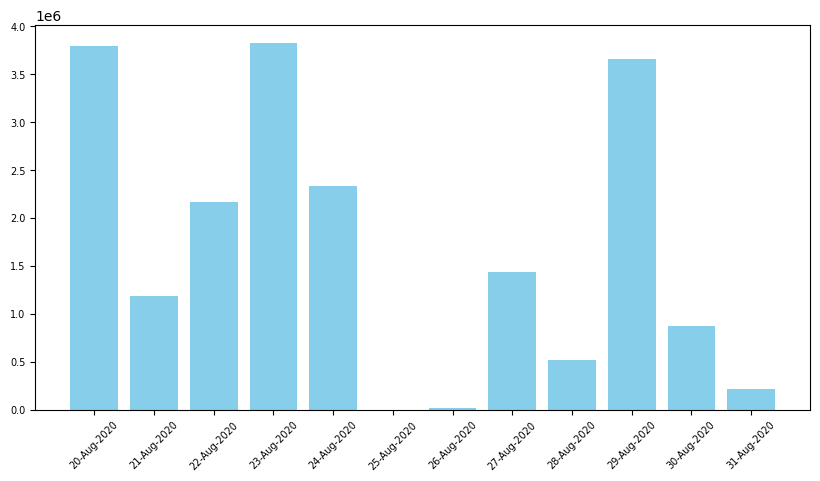

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(withdrawl_sum['Date'].dt.strftime('%d-%b-%Y'), withdrawl_sum['Withdrawls'], color='skyblue')
plt.xticks(rotation=45,fontsize=7)
plt.yticks(fontsize=7)
print(plt.yticks())